In [ ]:
import numpy as np

# Adjacency matrix of ethanol
A = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
])

# Degree matrix of ethanol
D = np.array([
    [1, 0, 0],
    [0, 2, 0],
    [0, 0, 1]
])

L = D - A # Graph Laplacian

# Numerical eigendecomposition
eigenvalues, eigenvectors = np.linalg.eigh(L)

print("Eigenvalues:", np.round(eigenvalues, 5))

Eigenvalues: [0. 1. 3.]


In [17]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
# Define benzene heavy-atom graph (C6 ring)
benzene = nx.cycle_graph(6)  # 6 carbon atoms in a ring

# Define hexane heavy-atom graph (linear chain of 6 carbons)
hexane = nx.path_graph(6)  # 6 carbon atoms in a chain

# Compute Laplacian eigenvalues
benzene_L = nx.laplacian_matrix(benzene).toarray()
hexane_L = nx.laplacian_matrix(hexane).toarray()

benzene_eigs = np.round(np.sort(np.linalg.eigvalsh(benzene_L)), 2)
hexane_eigs = np.round(np.sort(np.linalg.eigvalsh(hexane_L)), 2)

benzene_eigs, hexane_eigs

(array([-0.,  1.,  1.,  3.,  3.,  4.]),
 array([0.  , 0.27, 1.  , 2.  , 3.  , 3.73]))

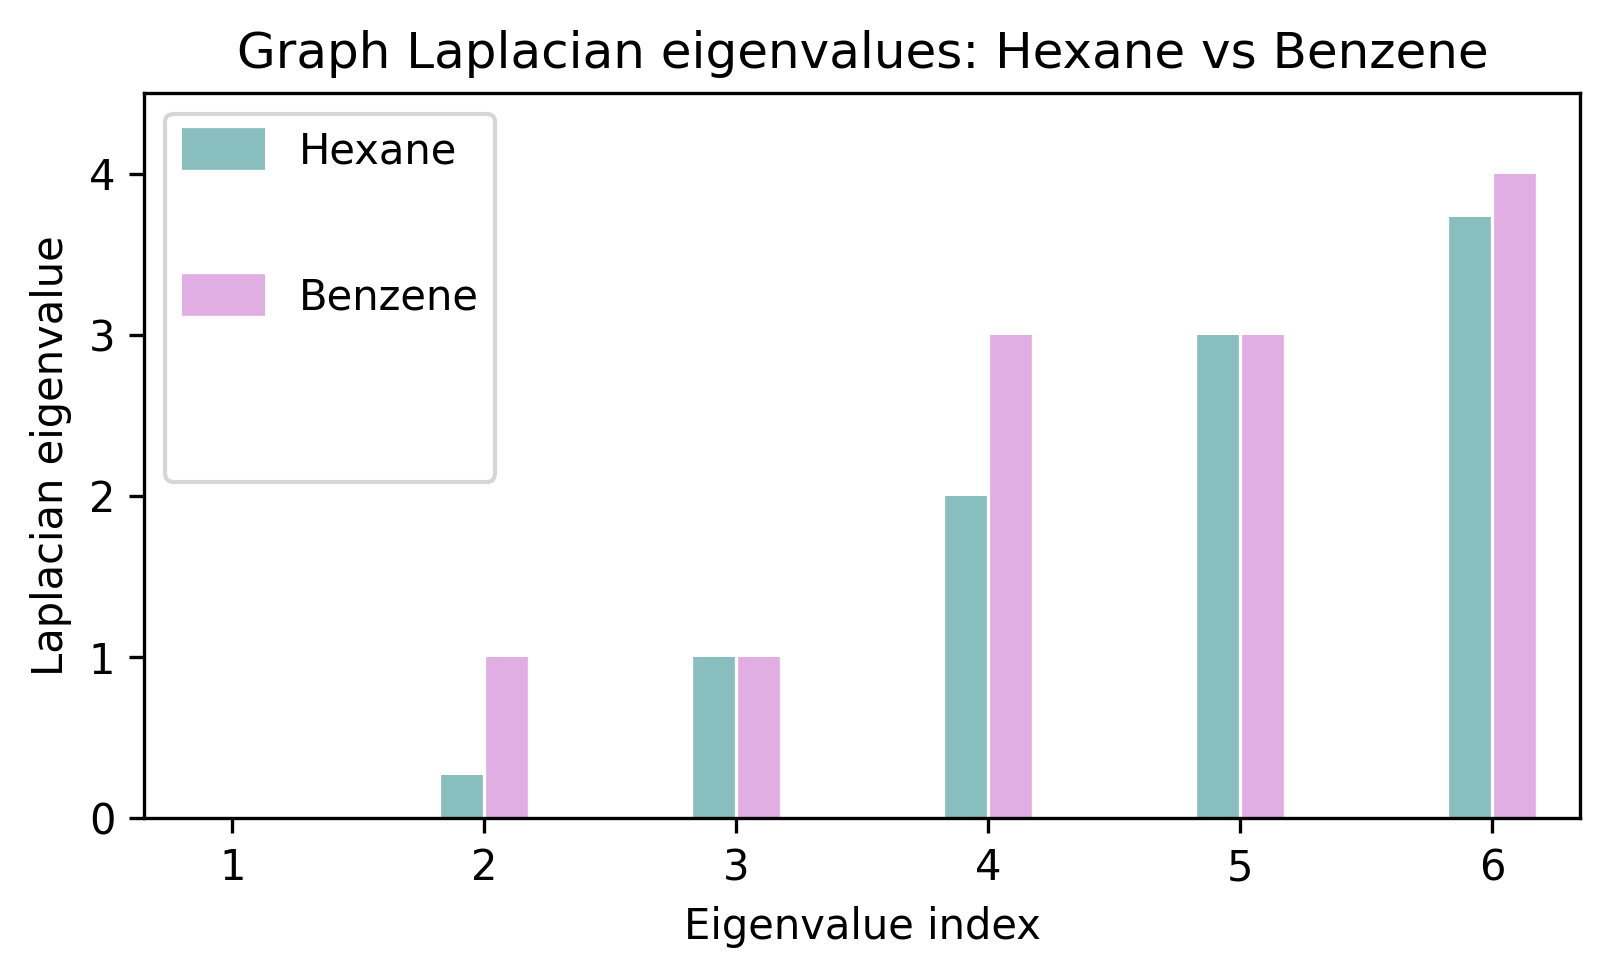

In [ ]:
# Plot
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
fs = 10
plt.rcParams.update({'font.size': fs})
plt.figure(figsize=(504/72 * 0.8, 504/72 * 0.6*0.8), dpi=300)
plt.vlines(1 + np.arange(6)-0.09, 0, hexane_eigs, color='#89bebf', linewidth=10, label='Hexane')
plt.vlines(1 + np.arange(6)+0.09, 0, benzene_eigs, color='#e1aee4', linewidth=10, label='Benzene')
plt.vlines(1 + np.arange(6)+0.09, 0, benzene_eigs, color='#e1aee4', linewidth=10, label=' ', alpha=0.0)
plt.ylim([0,4.5])
plt.xlabel("Eigenvalue index")
plt.ylabel("Laplacian eigenvalue")
plt.title("Graph Laplacian eigenvalues: Hexane vs Benzene", fontsize=fs+2)
plt.legend(loc='upper left', labelspacing=2.5)
plt.tight_layout()
plt.savefig('figs/graph_laplacian.svg')
plt.show()